## Libraries import + matplotlib preset

In [1]:
import os
import re   
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
# pixel in inches for figsize
px = 1/plt.rcParams['figure.dpi']
# default figsize for all figures
plt.rcParams['figure.figsize'] = [1000*px, 600*px]

## Crate paths for csv files

In [2]:
CURR_DIR = os.getcwd()
print(CURR_DIR)
data_path = os.path.join(CURR_DIR, 'datasets/Sleeve-material-loss-measurement-2.csv')

/Users/wszczawinski/Projects/master-thesis/analyses


## Create dataframe from .cvs

In [3]:
df = pd.read_csv(data_path, sep=';', decimal=',')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444491 entries, 0 to 444490
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Count         444491 non-null  int64  
 1   obl X         444491 non-null  object 
 2   obl Y         444491 non-null  object 
 3   Odczyt Z      444491 non-null  float64
 4   Odczyt otwor  444491 non-null  object 
 5   Odczyt wal    444491 non-null  object 
 6   Kat obrotu    444491 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 23.7+ MB


/opt/homebrew/Caskroom/miniconda/base/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Dropping not relevant columns

In [5]:
df = df.drop(['Number In Batch', 'Time (ms)', 'Timestamp', 'Trigger'], axis = 1)

df


,Count,obl X,obl Y,Odczyt Z,Odczyt otwor,Odczyt wal,Kat obrotu
0,1,"0,3655",0,-89.696,"0,3655","1,0097",0.00
1,2,"0,3655",0,-89.696,"0,3655","1,0097",0.00
2,3,"0,3655",0,-89.696,"0,3654","1,0098",0.00
3,4,"0,3655",0,-89.696,"0,3655","1,0097",0.00
4,5,"0,3655",0,-89.696,"0,3654","1,0097",0.00
...,...,...,...,...,...,...,...
444486,444487,"0,3201","-0,0496",-0.008,"0,3238",1.0886,351.18
444487,444488,"0,3201","-0,0496",-0.008,"0,3238",1.0886,351.18
444488,444489,"0,32","-0,0496",-0.008,"0,3238",1.0886,351.18
444489,444490,"0,3201","-0,0496",-0.008,"0,3238",1.0886,351.18


## Removing rows with measurments over and under range of the sensor

In [6]:
for col in ['obl X', 'obl Y', 'Odczyt otwor', "Odczyt wal"]:
    df = df[df[col].str.contains("Over Range")==False]
    df = df[df[col].str.contains("Under Range")==False]
    df[col] = pd.to_numeric(df[col].apply(lambda x: re.sub(',', '.', str(x))))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108683 entries, 0 to 131071
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Count         108683 non-null  int64  
 1   obl X         108683 non-null  float64
 2   obl Y         108683 non-null  float64
 3   Odczyt Z      108683 non-null  float64
 4   Odczyt otwor  108683 non-null  float64
 5   Odczyt wal    108683 non-null  float64
 6   Kat obrotu    108683 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 6.6 MB


## Data exploration

In [7]:
df.head(130)

,Count,obl X,obl Y,Odczyt Z,Odczyt otwor,Odczyt wal,Kat obrotu
0,1,0.3655,0.0000,-89.696,0.3655,1.0097,0.00
1,2,0.3655,0.0000,-89.696,0.3655,1.0097,0.00
2,3,0.3655,0.0000,-89.696,0.3654,1.0098,0.00
3,4,0.3655,0.0000,-89.696,0.3655,1.0097,0.00
4,5,0.3655,0.0000,-89.696,0.3654,1.0097,0.00
...,...,...,...,...,...,...,...
125,126,0.2664,0.1107,-89.696,0.2884,1.0122,22.57
126,127,0.2631,0.1123,-89.696,0.2861,1.0121,23.11
127,128,0.2604,0.1135,-89.696,0.2841,1.0118,23.54
128,129,0.2584,0.1149,-89.696,0.2827,1.0117,23.98


In [8]:
df.describe()

,Count,obl X,obl Y,Odczyt Z,Odczyt otwor,Odczyt wal,Kat obrotu
count,108683.000000,108683.000000,108683.000000,108683.000000,108683.00000,108683.00000,108683.000000
mean,65495.292235,0.020235,-0.057294,-76.358345,0.35194,1.00684,192.897722
std,37835.862154,0.255057,0.263748,7.690614,0.12019,0.03015,103.182166
min,1.000000,-0.613300,-0.461500,-89.696000,-0.62780,0.00060,0.000000
25%,32774.500000,-0.202600,-0.333100,-82.984000,0.28100,0.98870,100.010000
50%,65453.000000,0.018200,-0.059700,-76.384000,0.40030,1.00340,205.270000
75%,98240.500000,0.255200,0.207000,-69.636000,0.43580,1.02800,286.700000
max,131072.000000,0.626700,0.371400,-63.058000,0.46380,1.07690,351.650000


In [9]:
df.corr()

,Count,obl X,obl Y,Odczyt Z,Odczyt otwor,Odczyt wal,Kat obrotu
Count,1.000000,-0.004083,0.002840,0.999973,0.031321,0.020709,0.039892
obl X,-0.004083,1.000000,-0.030180,-0.003811,0.022766,0.582853,0.256780
obl Y,0.002840,-0.030180,1.000000,0.002817,-0.595186,0.144377,-0.792974
Odczyt Z,0.999973,-0.003811,0.002817,1.000000,0.031417,0.020605,0.040342
Odczyt otwor,0.031321,0.022766,-0.595186,0.031417,1.000000,-0.022435,0.545616
Odczyt wal,0.020709,0.582853,0.144377,0.020605,-0.022435,1.000000,0.009676
Kat obrotu,0.039892,0.256780,-0.792974,0.040342,0.545616,0.009676,1.000000


### Single arrays from columns for ploting purposes

In [10]:
x = df['obl X']
y = df['obl Y']
z = df['Odczyt Z']
hole = df['Odczyt otwor']
shaft = df['Odczyt wal']
angle = df['Kat obrotu']
count = df['Count']

### Correlation between X and angle

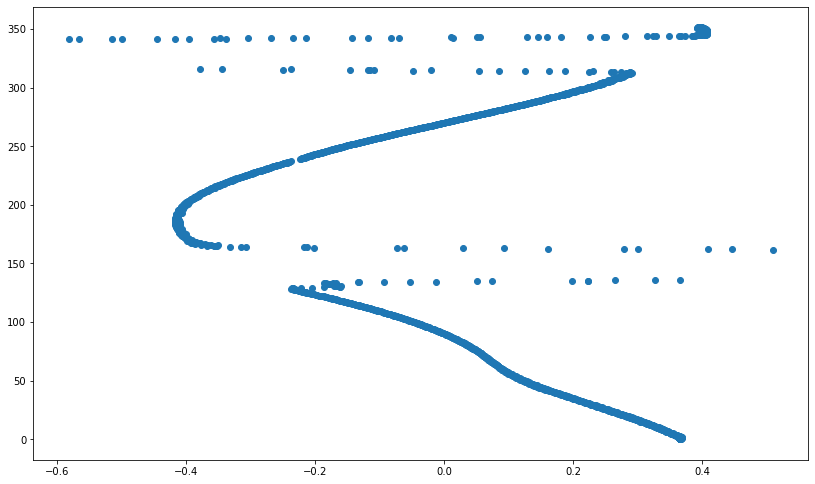

In [11]:
angles = angle[:2000]
xs = x[:2000]
plt.scatter(xs, angles)
plt.show()

array([[<AxesSubplot:title={'center':'Count'}>,
        <AxesSubplot:title={'center':'obl X'}>,
        <AxesSubplot:title={'center':'obl Y'}>],
       [<AxesSubplot:title={'center':'Odczyt Z'}>,
        <AxesSubplot:title={'center':'Odczyt otwor'}>,
        <AxesSubplot:title={'center':'Odczyt wal'}>],
       [<AxesSubplot:title={'center':'Kat obrotu'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

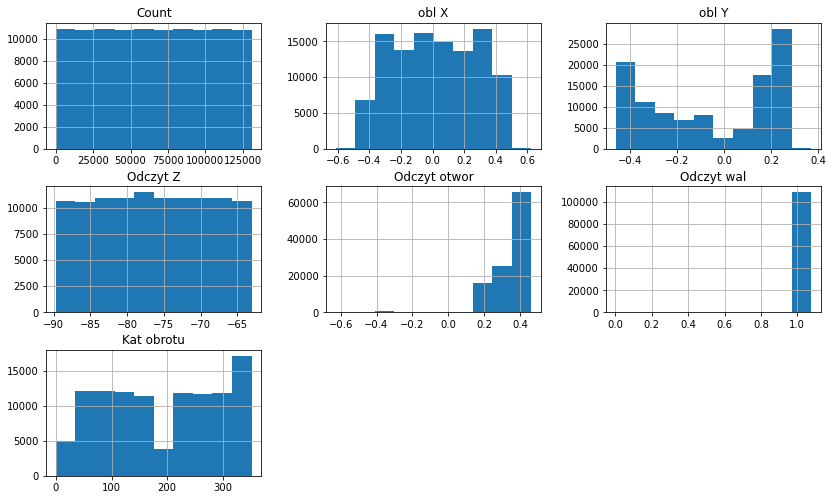

In [12]:
df.hist()

<AxesSubplot:>

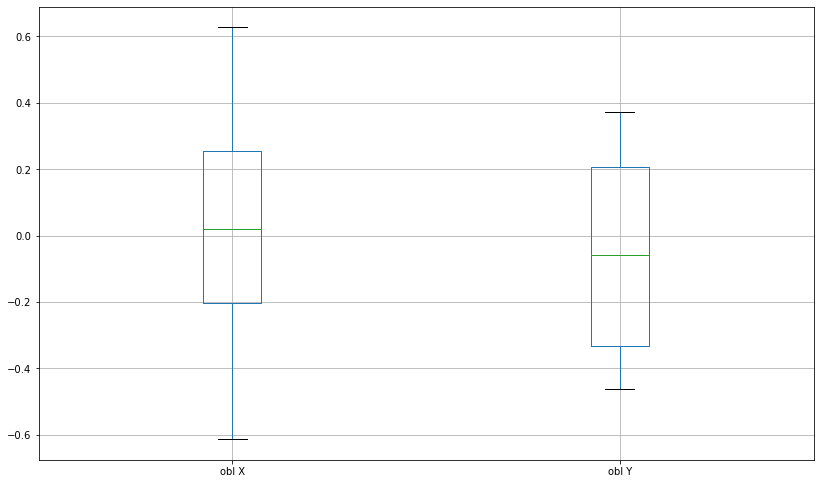

In [13]:
df.boxplot(column=['obl X', 'obl Y'])

Maximum angle value: 
351.65
Minimum angle value: 
0.0


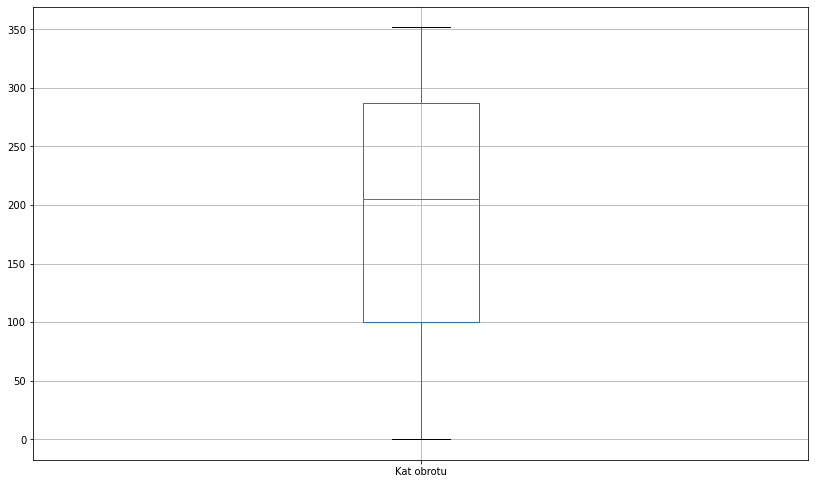

In [14]:
df.boxplot(column=['Kat obrotu'])
print('Maximum angle value: ')
print(df['Kat obrotu'].max())
print('Minimum angle value: ')
print(df['Kat obrotu'].min())

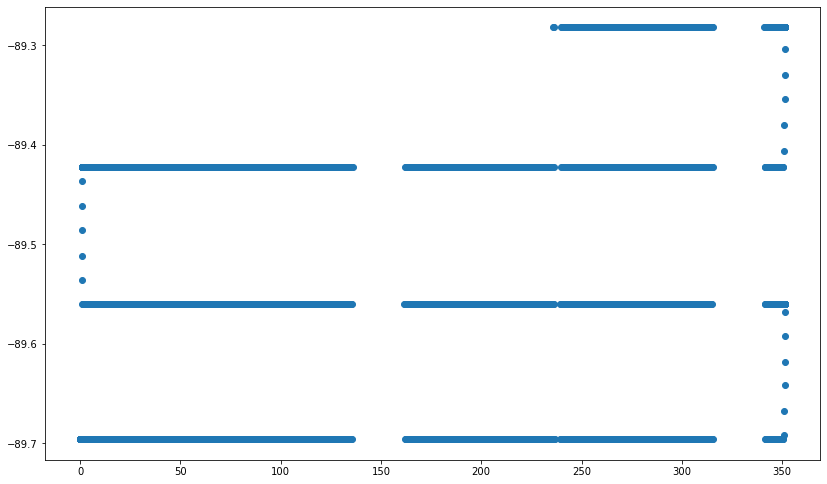

In [15]:
holes = hole[:2000]
angles = angle[:2000]
zs = z[:2000]
cs = count[:2000]


plt.scatter(angles, zs)
plt.show()

## 3D plotting

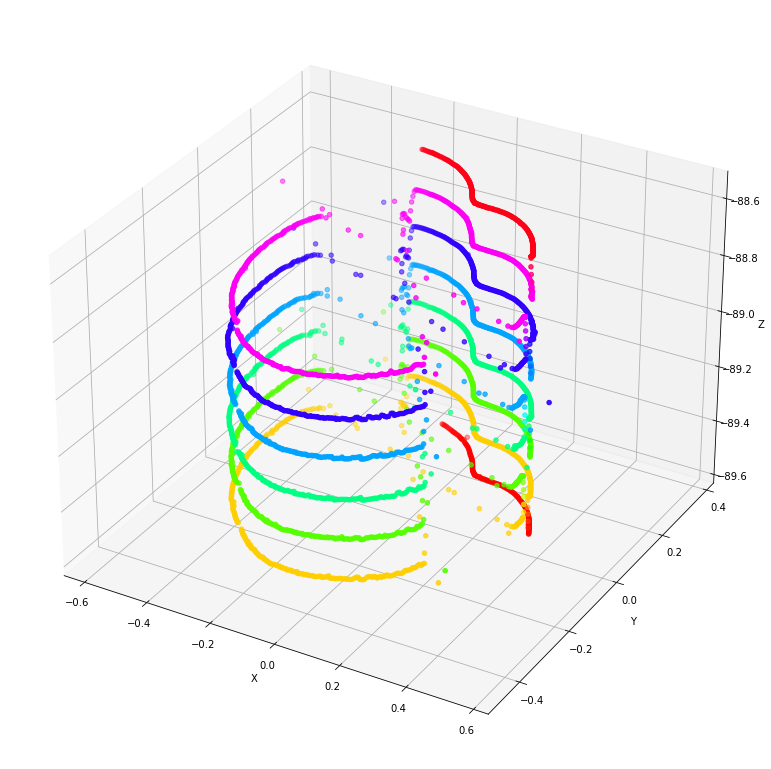

In [16]:

plt.figure(figsize=(1000*px, 1000*px))

ax = plt.axes(projection ='3d')



xs = x[1000: 5000]
ys = y[1000: 5000]
zs = z[1000: 5000]
angles = angle[1000: 5000]/100
cs = count[1000: 5000]


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter3D(xs, ys, zs, c=zs, cmap='hsv')


plt.show()

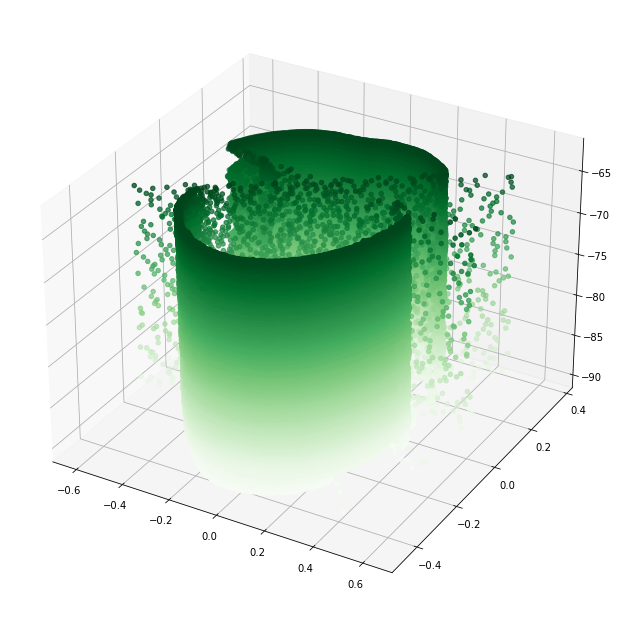

In [17]:
plt.figure(figsize=(800*px, 800*px))
ax = plt.axes(projection ='3d')

x = df['obl X']
y = df['obl Y']
z = df['Odczyt Z']
ax.scatter3D(x, y, z, c=z, cmap='Greens');
plt.show()

# z_points = 15 * np.random.random(100)
# x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
# y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
# ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv')

In [19]:
# import dash_core_components as dcc
# import plotly.graph_objects as go


# fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# fig.show()
